In [1]:
import imblearn
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns 
import os
from math import ceil 
import warnings
warnings.filterwarnings("ignore")

In [2]:
data= pd.read_csv(r'C:\Users\Quaresma\Documents\IRONHACK\Labs\29 lab-random-variable-distributions\files_for_lab\we_fn_use_c_marketing_customer_value_analysis.csv')

In [3]:
numerical_df= data.select_dtypes(include=np.number)
numerical_df   

,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount
0,2763.519279,56274,69,32,5,0,1,384.811147
1,6979.535903,0,94,13,42,0,8,1131.464935
2,12887.431650,48767,108,18,38,0,2,566.472247
3,7645.861827,0,106,18,65,0,7,529.881344
4,2813.692575,43836,73,12,44,0,1,138.130879
...,...,...,...,...,...,...,...,...
9129,23405.987980,71941,73,18,89,0,2,198.234764
9130,3096.511217,21604,79,14,28,0,1,379.200000
9131,8163.890428,0,85,9,37,3,2,790.784983
9132,7524.442436,21941,96,34,3,0,3,691.200000


In [4]:
def stacked_distplot(df):
    sns.set()

    fig, axes=plt.subplots(2, ceil(len(df.columns)/2),figsize=(20,11))

    for ax, feat in zip(axes.flatten(), df.columns): 
        sns.distplot(df[feat], ax=ax)
        ax.set_title(feat, y=-0.14)
        
    title = "Continuos Variables"
    plt.suptitle(title)
    
    plt.show()

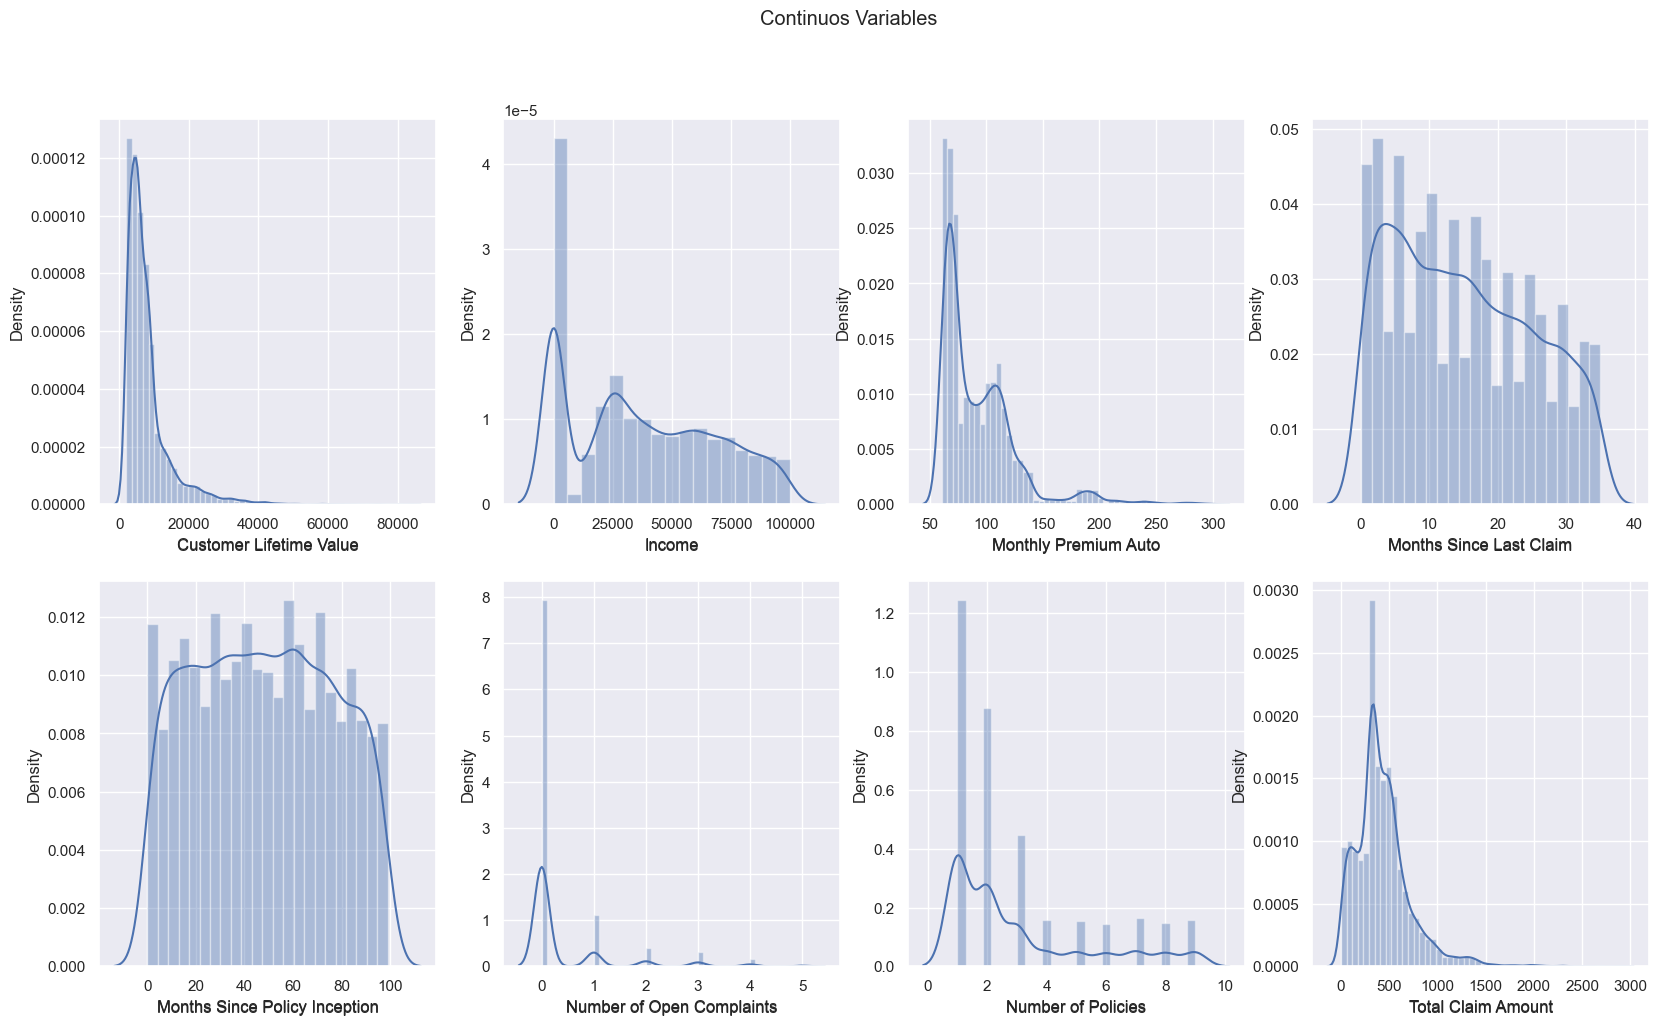

In [5]:
stacked_distplot(numerical_df)

In [6]:
from sklearn.preprocessing import StandardScaler
scaler1 = StandardScaler() #This is called initialization
stand_data = scaler1.fit_transform(numerical_df) # Fit into data
stand_data = pd.DataFrame(stand_data, columns= numerical_df.columns)
stand_data

,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount
0,-0.762878,0.612827,-0.703925,1.678099,-1.543287,-0.422250,-0.822648,-0.169640
1,-0.149245,-1.239617,0.022691,-0.208186,-0.217334,-0.422250,2.106160,2.400737
2,0.710636,0.365710,0.429596,0.288205,-0.360680,-0.422250,-0.404247,0.455734
3,-0.052263,-1.239617,0.371467,0.288205,0.606907,-0.422250,1.687759,0.329769
4,-0.755575,0.203390,-0.587666,-0.307465,-0.145661,-0.422250,-0.822648,-1.018843
...,...,...,...,...,...,...,...,...
9129,2.241590,1.128558,-0.587666,0.288205,1.466984,-0.422250,-0.404247,-0.811934
9130,-0.714411,-0.528450,-0.413278,-0.108908,-0.719046,-0.422250,-0.822648,-0.188956
9131,0.023135,-1.239617,-0.238891,-0.605299,-0.396517,2.873245,-0.404247,1.227937
9132,-0.069935,-0.517356,0.080820,1.876656,-1.614960,-0.422250,0.014154,0.885113


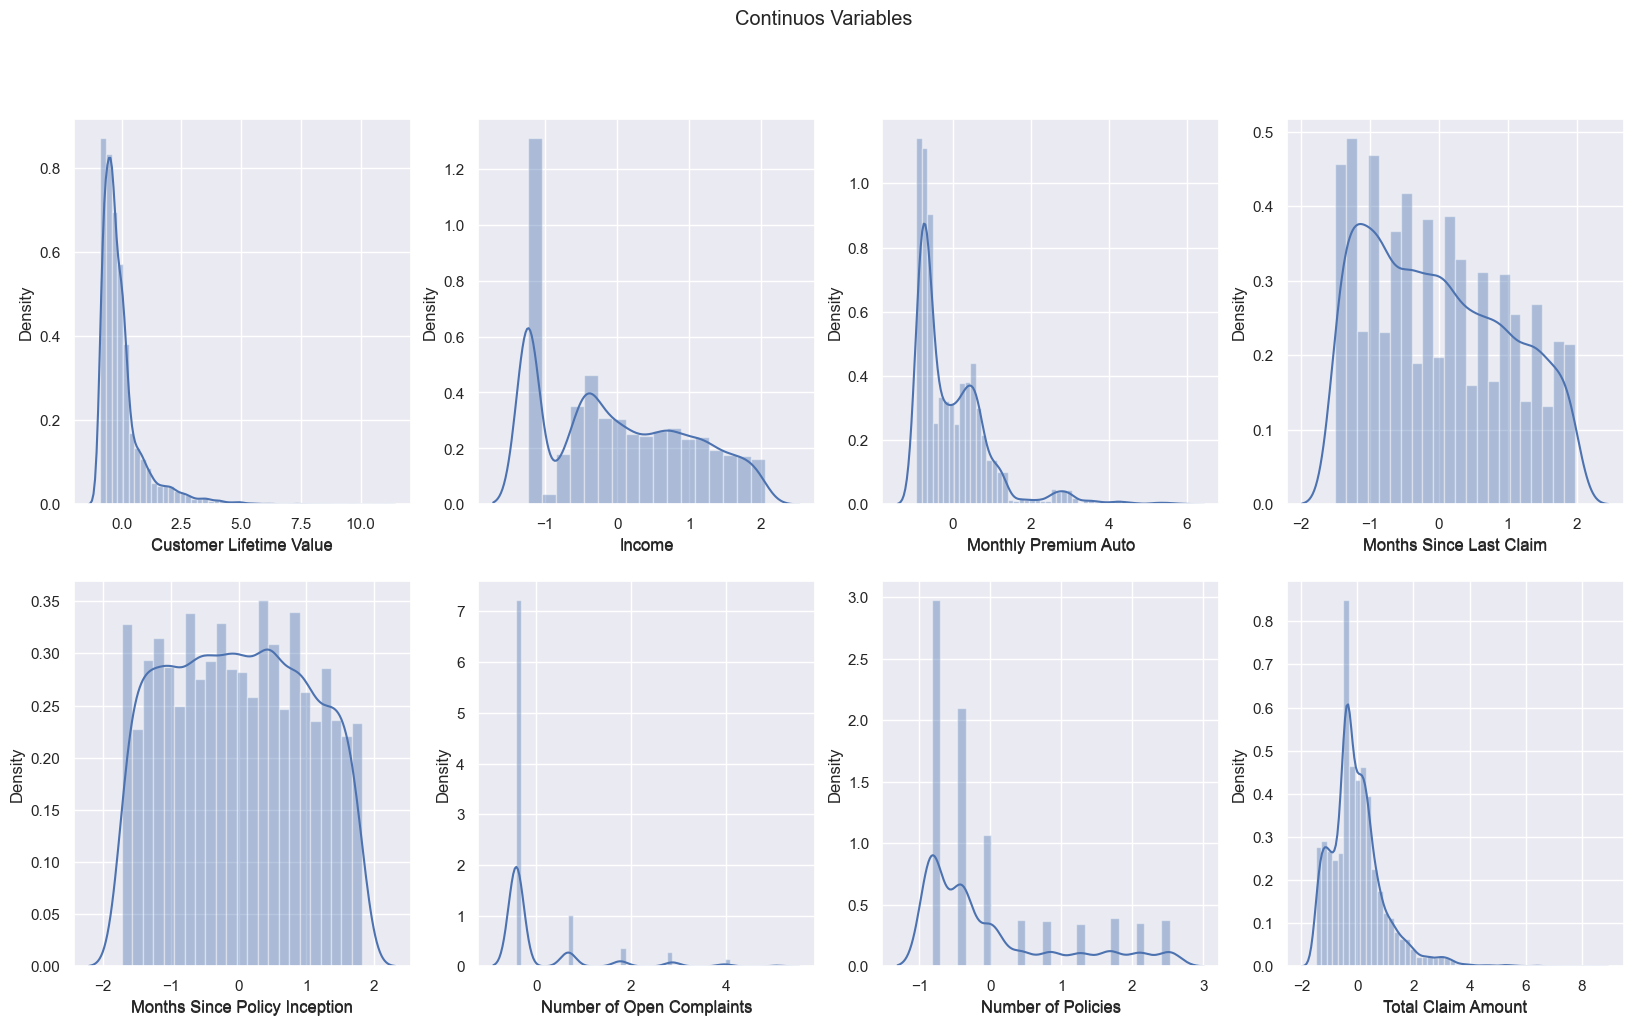

In [7]:
stacked_distplot(stand_data)

In [8]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler() 
normalized_data = scaler.fit_transform(numerical_df) 
normalized_data = pd.DataFrame(normalized_data, columns= numerical_df.columns)
normalized_data

,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount
0,0.010629,0.562847,0.033755,0.914286,0.050505,0.0,0.000,0.132974
1,0.062406,0.000000,0.139241,0.371429,0.424242,0.0,0.875,0.391051
2,0.134960,0.487763,0.198312,0.514286,0.383838,0.0,0.125,0.195764
3,0.070589,0.000000,0.189873,0.514286,0.656566,0.0,0.750,0.183117
4,0.011245,0.438443,0.050633,0.342857,0.444444,0.0,0.000,0.047710
...,...,...,...,...,...,...,...,...
9129,0.264137,0.719547,0.050633,0.514286,0.898990,0.0,0.125,0.068485
9130,0.014719,0.216081,0.075949,0.400000,0.282828,0.0,0.000,0.131034
9131,0.076951,0.000000,0.101266,0.257143,0.373737,0.6,0.125,0.273297
9132,0.069098,0.219452,0.147679,0.971429,0.030303,0.0,0.250,0.238876


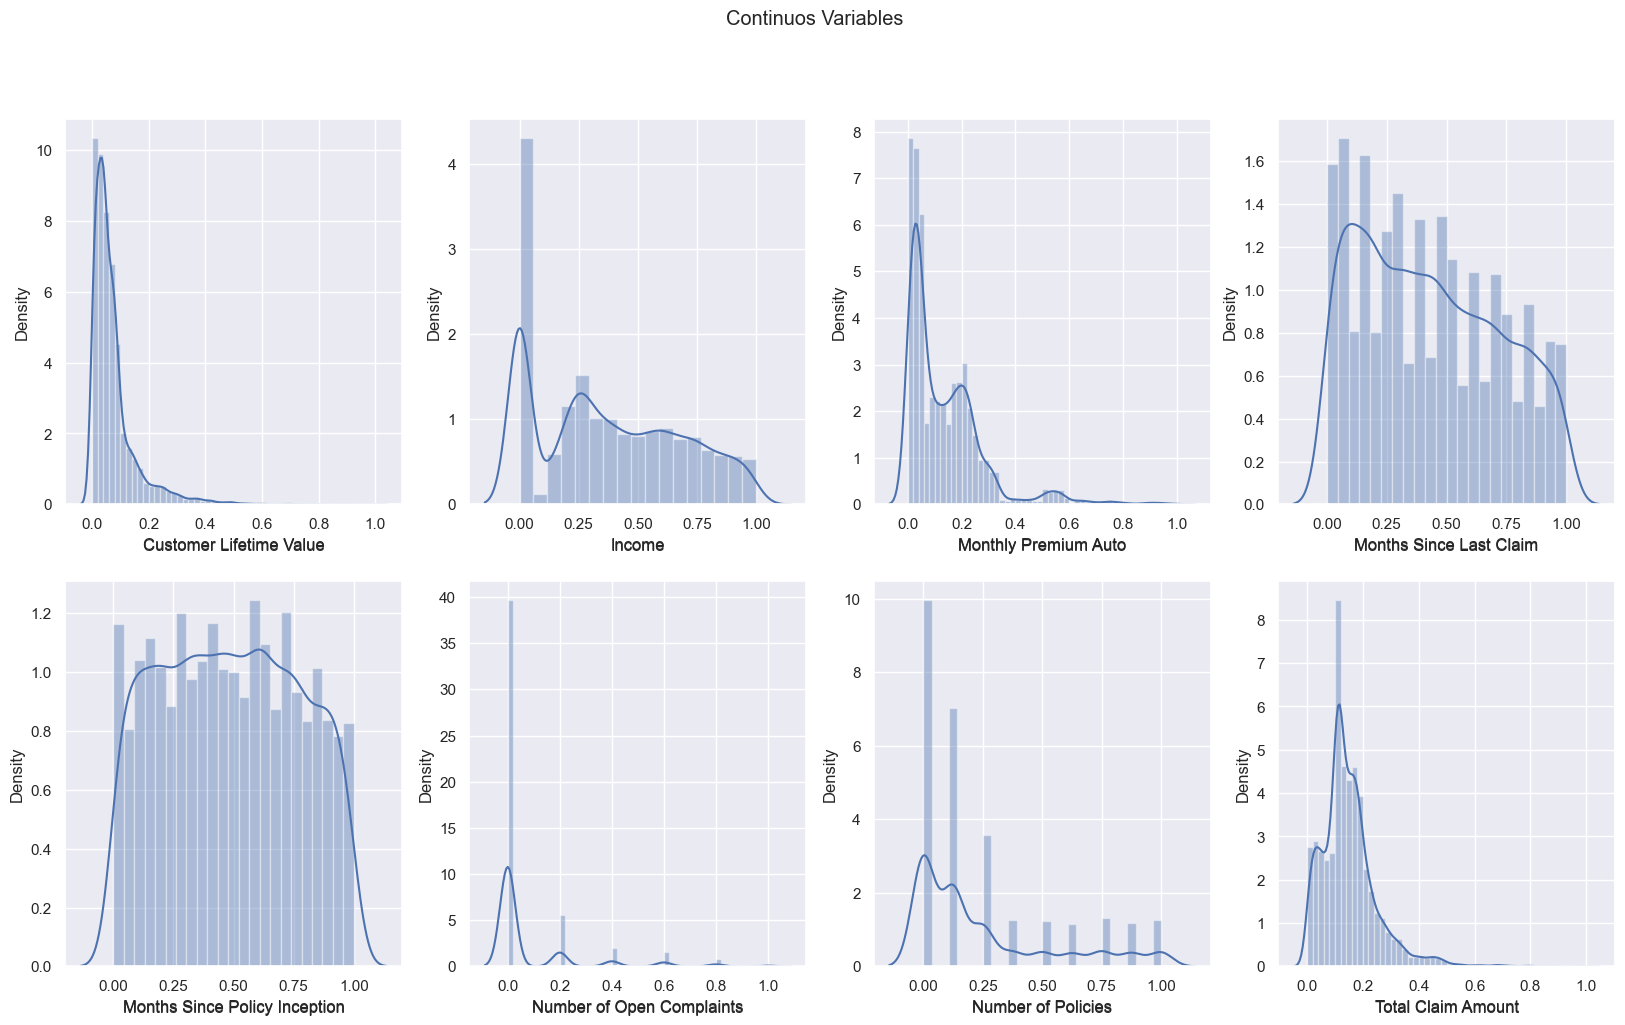

In [9]:
stacked_distplot(normalized_data)

In [20]:
num_log= np.log(numerical_df)


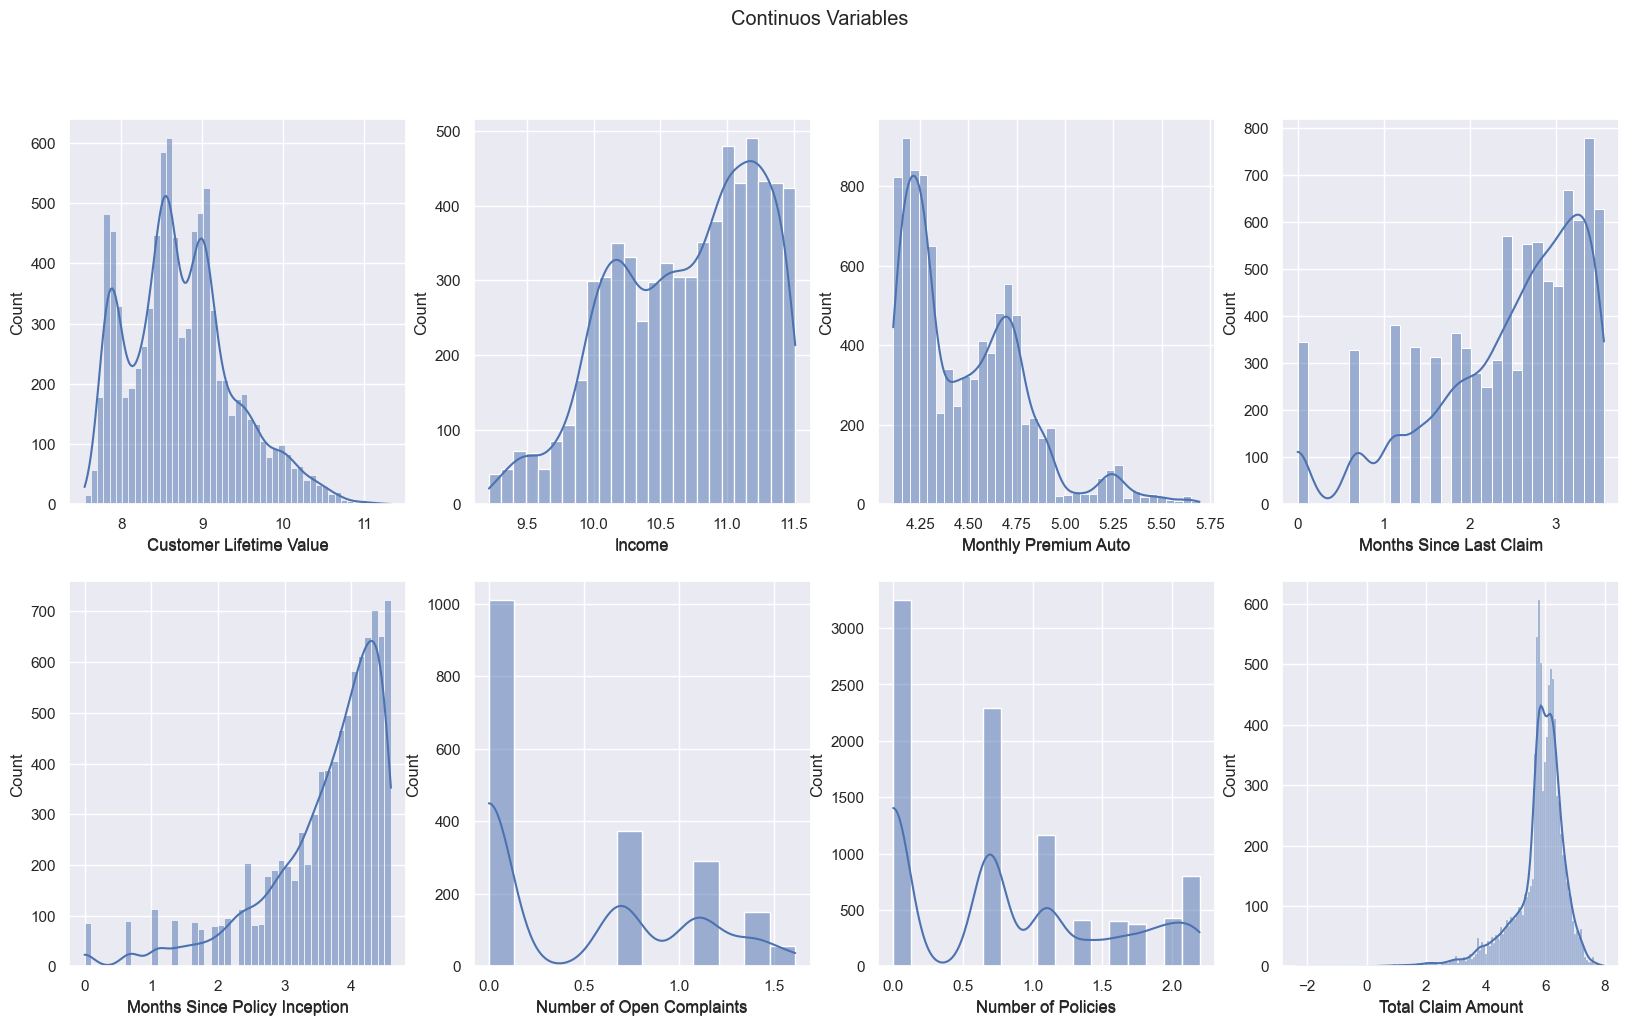

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt

def subplot_distplots(dataframe):
    sns.set()
    fig, axes=plt.subplots(2, ceil(len(dataframe.columns)/2),figsize=(20,11))
    

    # Plot distplots for each numerical column
    
    for ax, feat in zip(axes.flatten(), dataframe.columns):
        sns.histplot(dataframe[feat], kde=True, ax=ax)
        ax.set_title(feat, y=-0.14)
    
    title = "Continuos Variables"
    plt.suptitle(title)    

    # Show the plots
    plt.show()

# Example usage:
# Assuming 'df' is your DataFrame
subplot_distplots(num_log)

In [ ]:
# Any of them look similar to a normal distribution